In [1]:
import sys, os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from functions import *

%load_ext autoreload
%autoreload 2

In [2]:
x = np.linspace(-1, 1, 100).reshape(-1, 1)
y = 1/(1 + 25 * x**2) + 0.1 * np.random.normal(0, 1, x.shape)

In [3]:
Regression_FFNN = NeuralNetwork(1, [8, 1], [sigmoid, sigmoid], [derivate(sigmoid), derivate(sigmoid)], mse, mse_der)

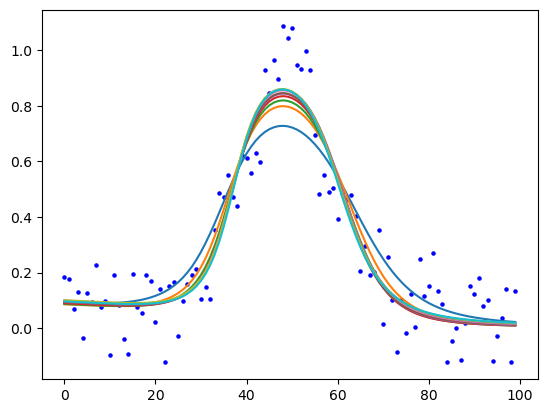

In [ ]:
for i in range(10):
    Regression_FFNN.train_SGD(x, y, learning_rate=0.2, epochs=1000,batch_size=5)
    y_pred = Regression_FFNN._feed_forward(x)
    plt.plot(x,y_pred, label=f'Training run {i+1}')
plt.scatter(x,y, color='blue', s=5)
plt.legend()